In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-depression-dataset


In [ ]:
import pandas as pd
import os
files = os.listdir(path)
print("Files in dataset folder:", files)

Files in dataset folder: ['student_depression_dataset.csv']


In [ ]:
dataset_file = os.path.join(path, "student_depression_dataset.csv")
df = pd.read_csv(dataset_file)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
df.sample(2)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2712,13819,Male,28.0,Pune,Student,5.0,0.0,8.59,4.0,0.0,'More than 8 hours',Healthy,BSc,Yes,10.0,4.0,Yes,1
11112,56246,Male,20.0,Vadodara,Student,4.0,0.0,9.91,3.0,0.0,'7-8 hours',Healthy,'Class 12',Yes,6.0,1.0,No,1


In [ ]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
df.duplicated().sum()

np.int64(0)

## Visualisasi

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def eda_univariate_numeric(df):
    # Mendapatkan kolom numerik dari dataframe
    numeric_columns = df.select_dtypes(include=['number']).columns
    num_columns = len(numeric_columns)

    # Menentukan jumlah kolom per baris dan jumlah baris yang dibutuhkan
    cols_per_row = 4
    num_rows = (num_columns + cols_per_row - 1) // cols_per_row

    # Mengatur ukuran figure untuk plot
    plt.figure(figsize=(16, 6 * num_rows))

    # Loop melalui setiap kolom numerik untuk membuat histogram
    for idx, col in enumerate(numeric_columns):
        plt.subplot(num_rows, cols_per_row, idx + 1)
        sns.histplot(df[col], kde=True, bins=30,palette='Set3')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    # Mengatur layout agar tidak tumpang tindih
    plt.tight_layout()
    plt.show()

<ipython-input-9-3045eeefb814>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30,palette='Set3')
<ipython-input-9-3045eeefb814>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30,palette='Set3')
<ipython-input-9-3045eeefb814>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30,palette='Set3')
<ipython-input-9-3045eeefb814>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30,palette='Set3')
<ipython-input-9-3045eeefb814>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30,palette='Set3')
<ipython-input-9-3045eeefb814>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins

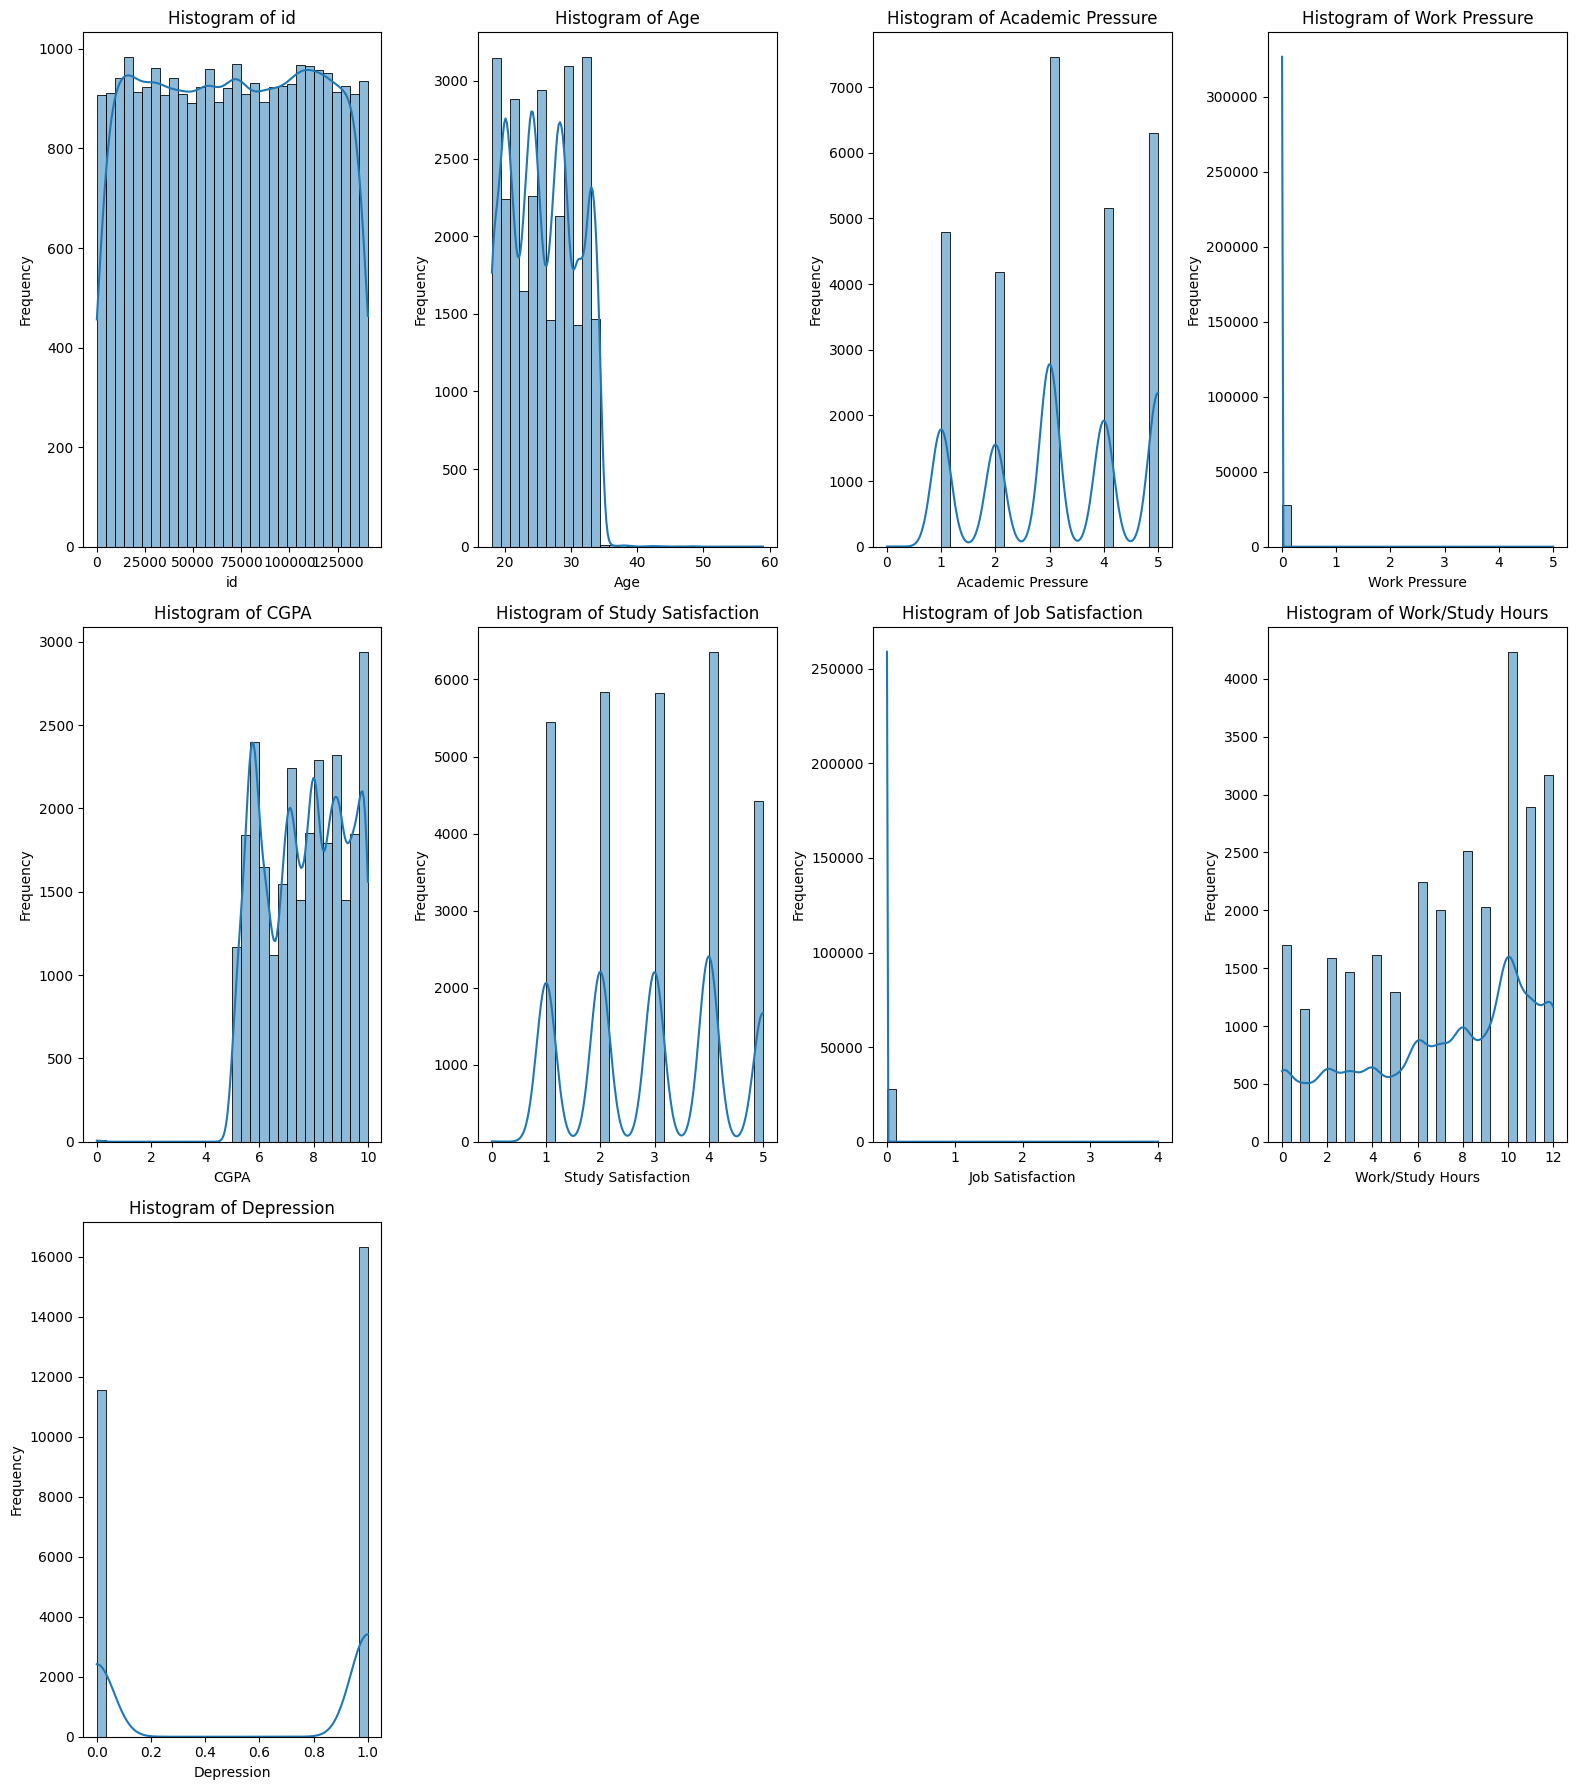

In [ ]:
eda_univariate_numeric(df)

In [ ]:
def eda_univariate_numeric_boxplot(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    num_columns = len(numeric_columns)

    cols_per_row = 4
    num_rows = (num_columns + cols_per_row - 1) // cols_per_row

    plt.figure(figsize=(16, 6 * num_rows))

    for idx, col in enumerate(numeric_columns):
        plt.subplot(num_rows, cols_per_row, idx + 1)
        sns.boxplot(y=df[col],palette='Set3')
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)

    plt.tight_layout()
    plt.show()

<ipython-input-11-a18f0eac6a3b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col],palette='Set3')
<ipython-input-11-a18f0eac6a3b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col],palette='Set3')
<ipython-input-11-a18f0eac6a3b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col],palette='Set3')
<ipython-input-11-a18f0eac6a3b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn

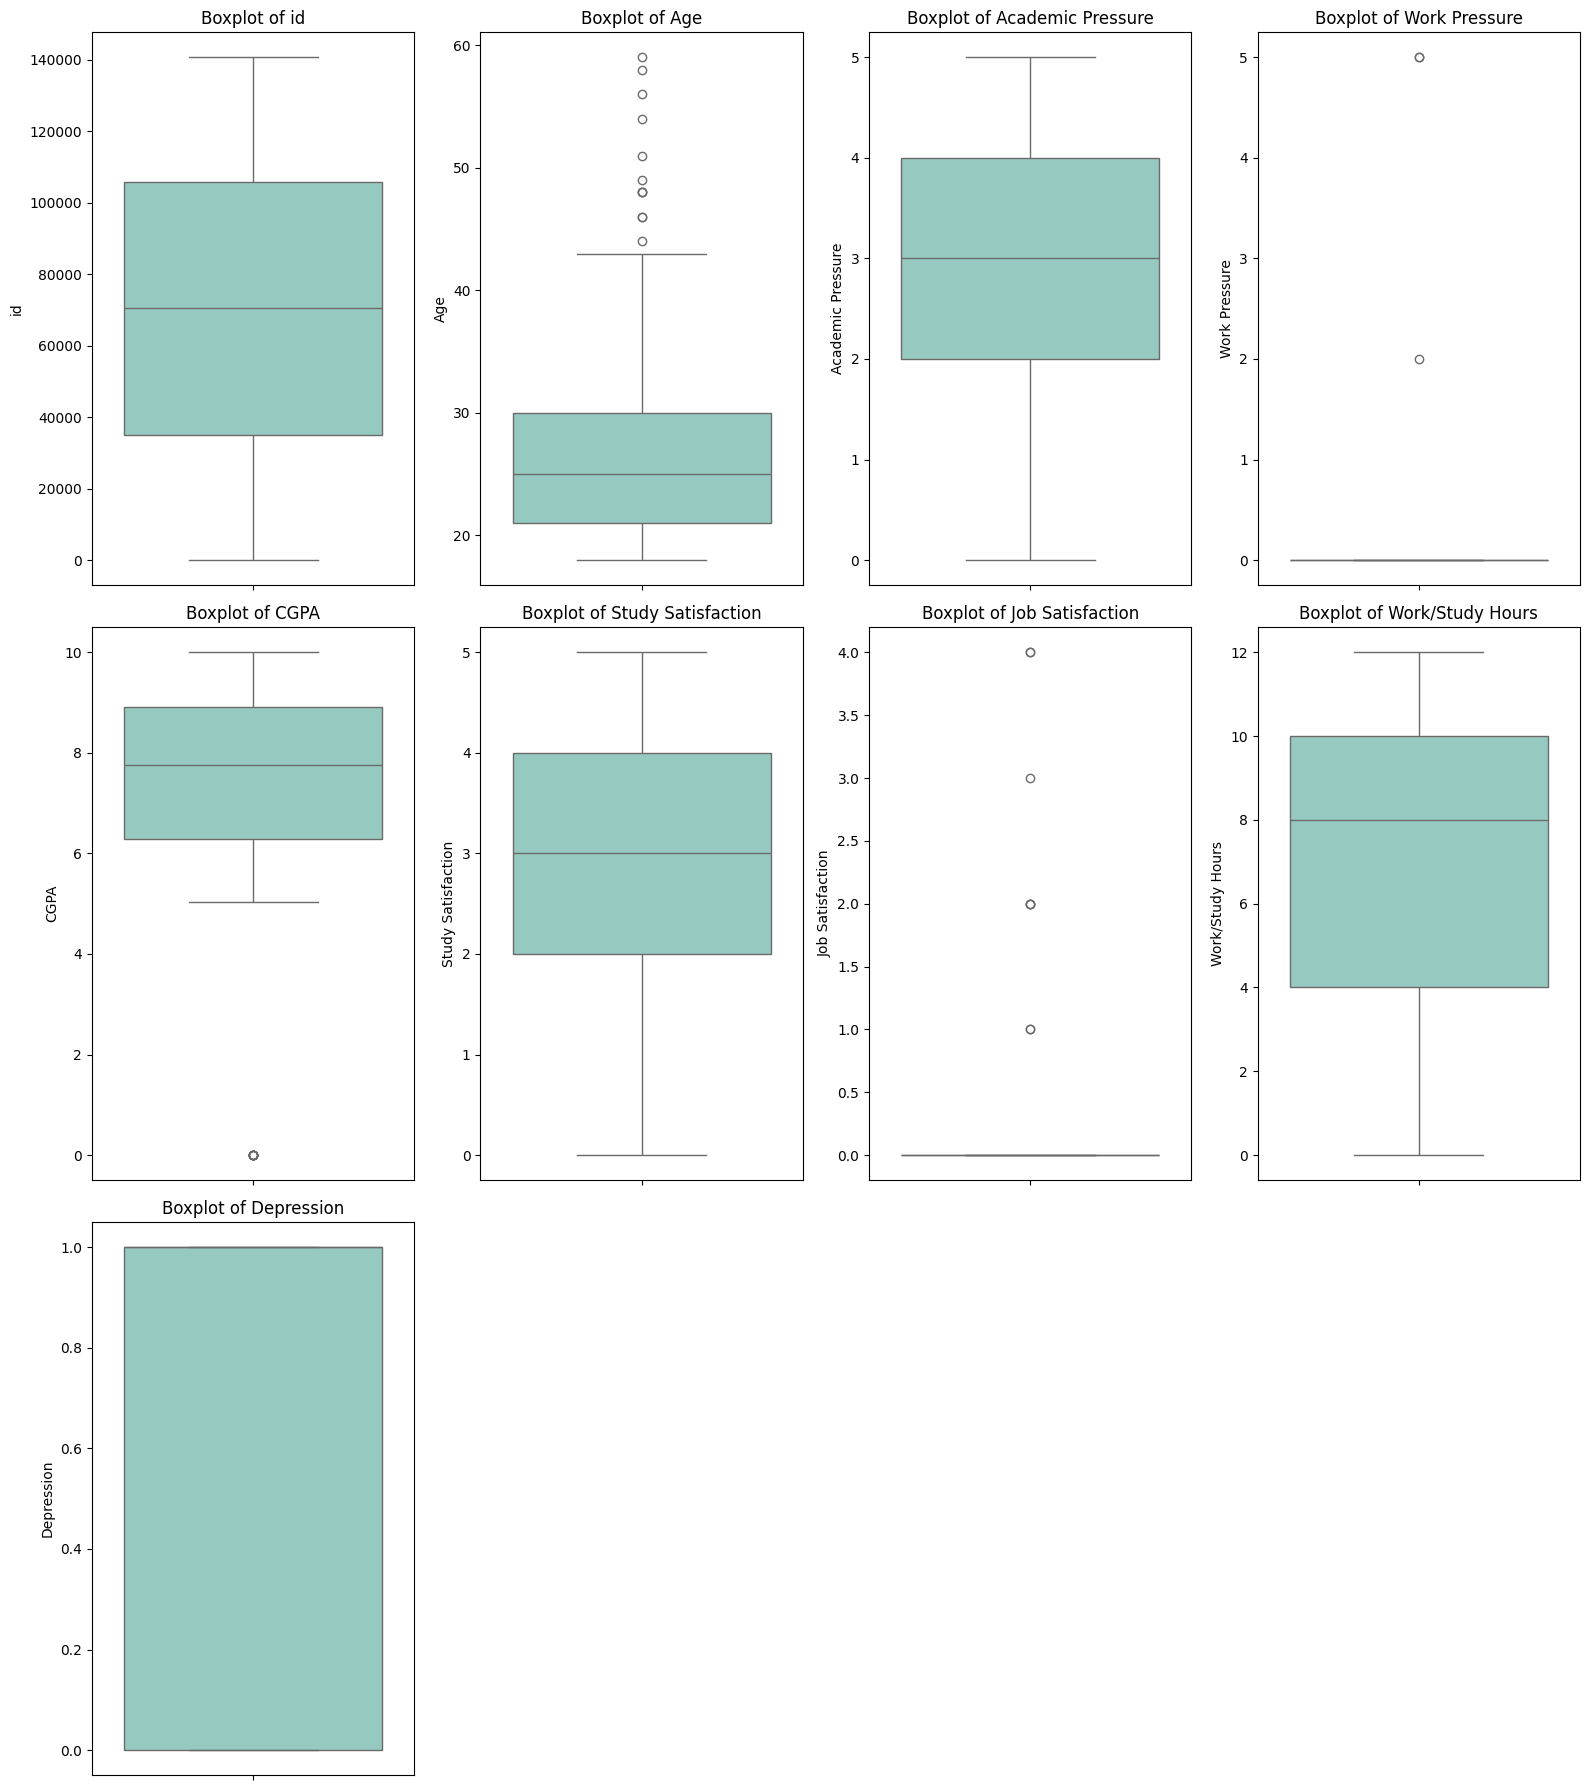

In [ ]:
eda_univariate_numeric_boxplot(df)

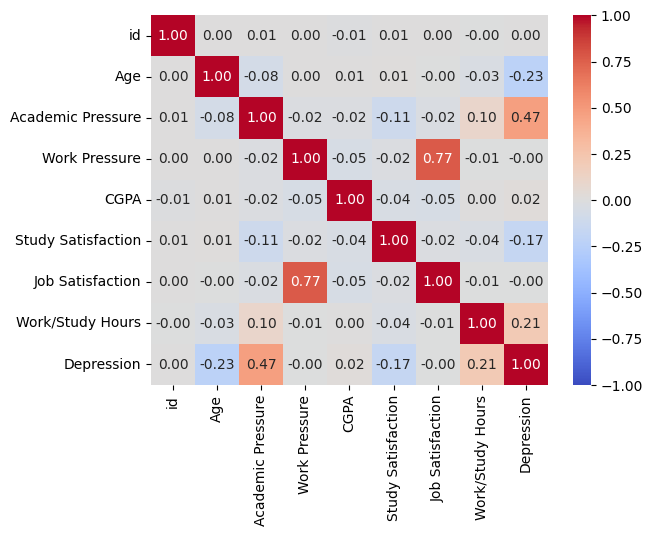

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="coolwarm", annot=True,fmt='.2f')
plt.show()

In [ ]:
df_copy = df.copy()

In [ ]:
#drop kolom id
df = df.drop('id', axis=1)

In [ ]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
def plot_target_pie(df, target_col):
    target_counts = df[target_col].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(
        target_counts,
        labels=target_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors
    )
    plt.title(f'Distribution of {target_col}')
    plt.axis('equal')
    plt.show()


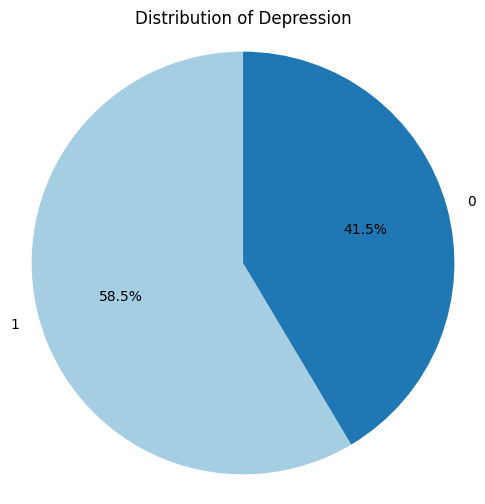

In [ ]:
plot_target_pie(df, 'Depression')

## Hasil Analisis
1. Data cukup balanced, tidak perlu melakukan handling imbalanced
2. Perlu atasi outlier pada kolom age, sekitar di umur 43 tahun
3. berdasarkan heatmap, kolom job stafication, Work Pressure	, CGPA tidak memiliki pengaruh terhadap target. Sehingga dapat di drop saja

In [ ]:
#Hapus Outlier pada kolom Age
df = df[df['Age'] < 43]


<ipython-input-9-3045eeefb814>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30,palette='Set3')
<ipython-input-9-3045eeefb814>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30,palette='Set3')
<ipython-input-9-3045eeefb814>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30,palette='Set3')
<ipython-input-9-3045eeefb814>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30,palette='Set3')
<ipython-input-9-3045eeefb814>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30,palette='Set3')
<ipython-input-9-3045eeefb814>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins

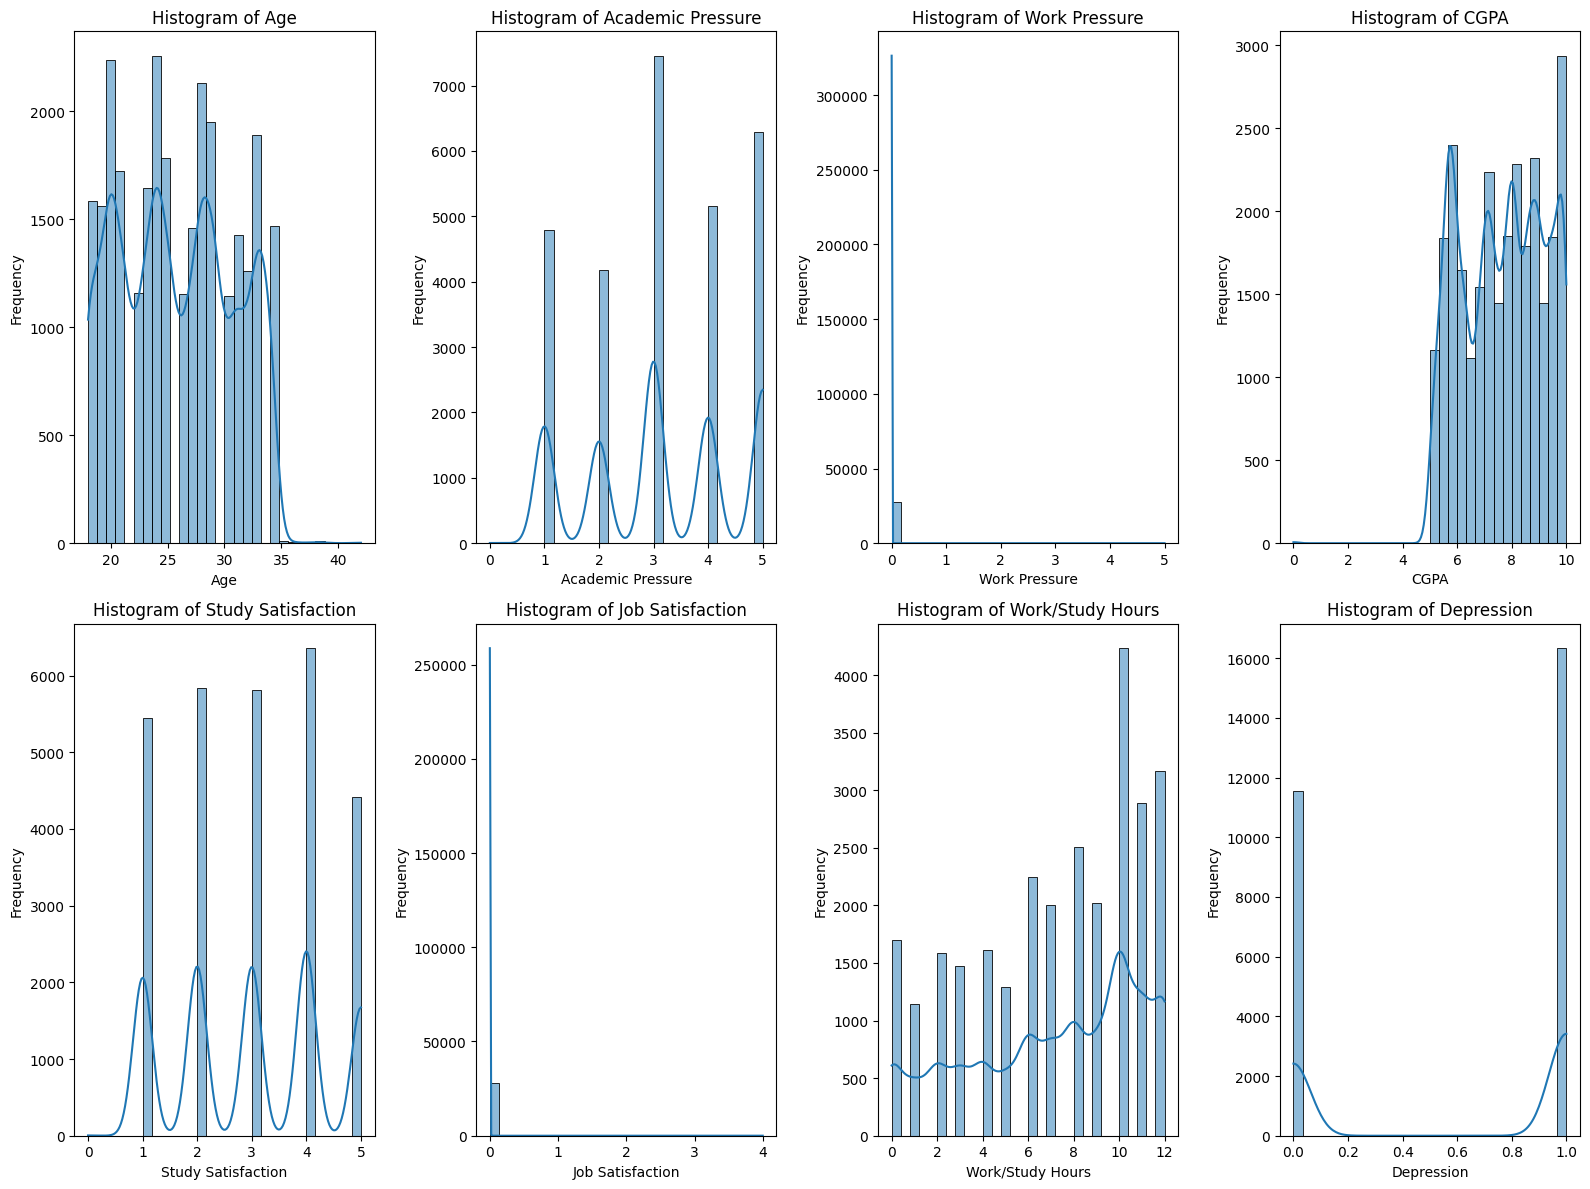

In [ ]:
eda_univariate_numeric(df)

<ipython-input-11-a18f0eac6a3b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col],palette='Set3')
<ipython-input-11-a18f0eac6a3b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col],palette='Set3')
<ipython-input-11-a18f0eac6a3b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col],palette='Set3')
<ipython-input-11-a18f0eac6a3b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn

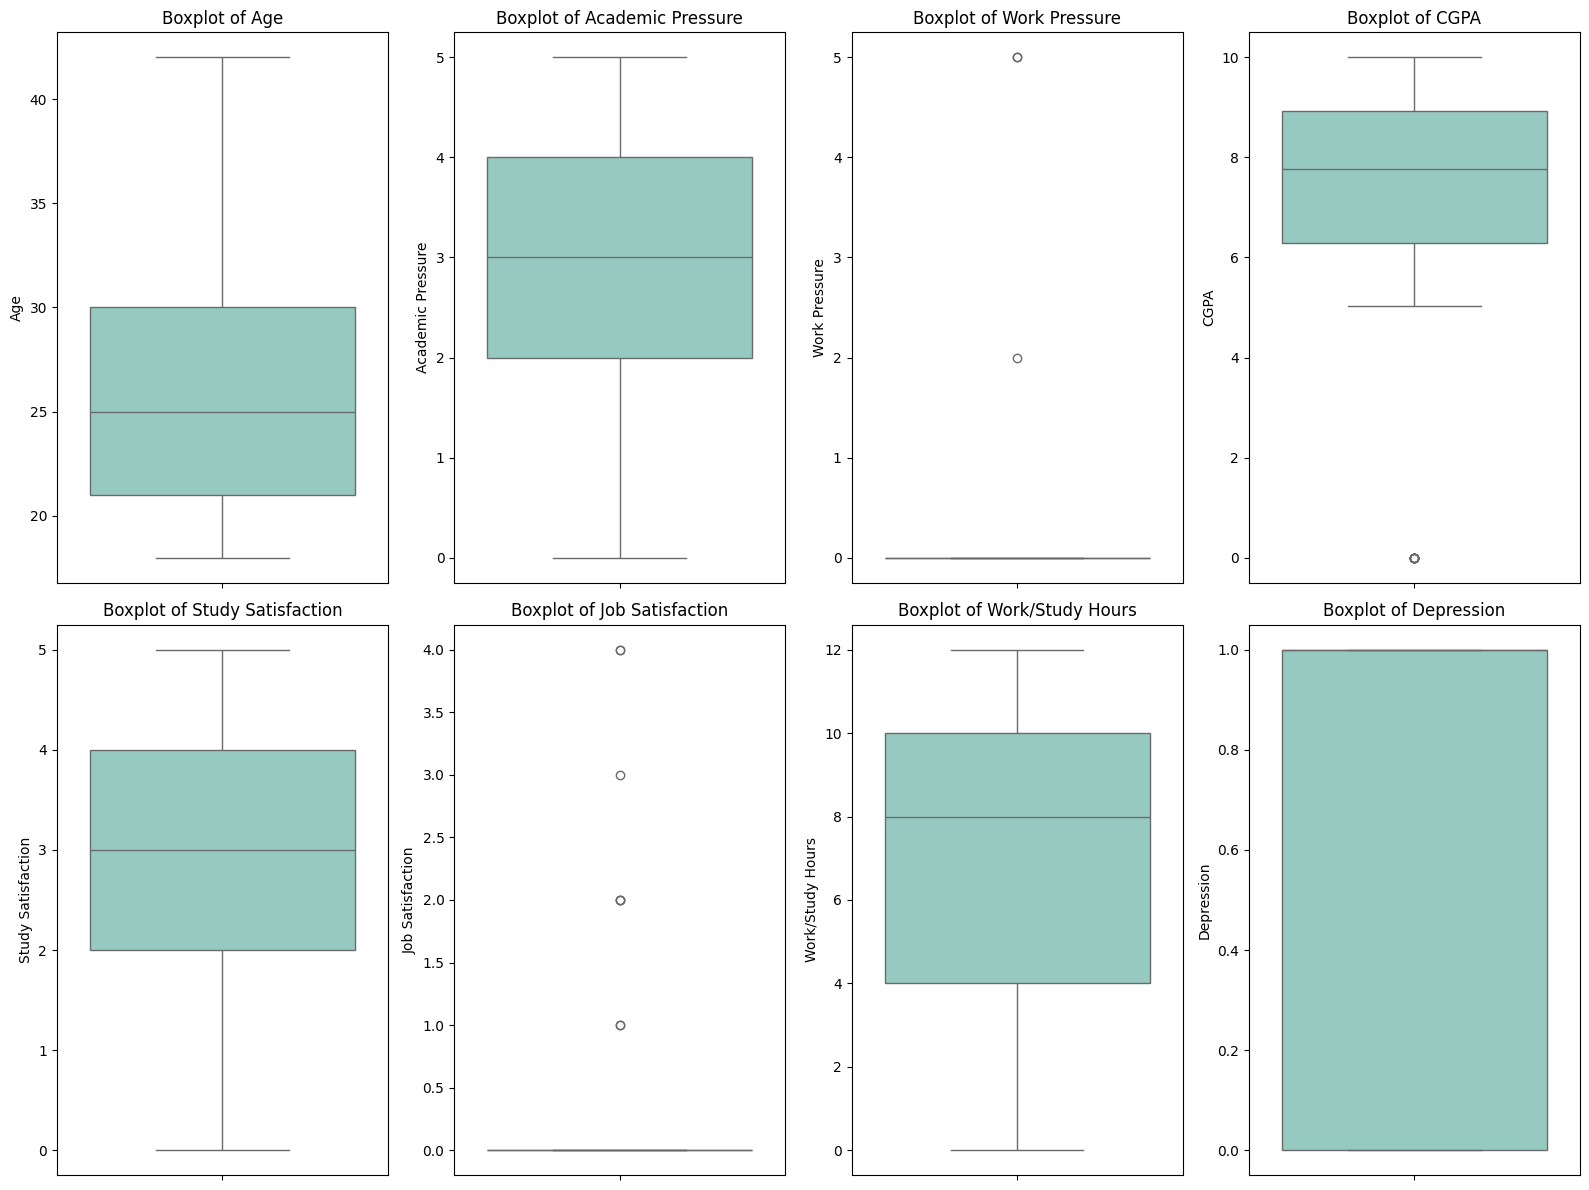

In [ ]:
eda_univariate_numeric_boxplot(df)

In [ ]:
def plot_all_categorical_histograms(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    num_columns = len(categorical_columns)

    cols_per_row = 3
    num_rows = (num_columns + cols_per_row - 1) // cols_per_row

    plt.figure(figsize=(6 * cols_per_row, 4 * num_rows))

    for idx, col in enumerate(categorical_columns):
        plt.subplot(num_rows, cols_per_row, idx + 1)
        order = df[col].value_counts().index
        ax = sns.countplot(data=df, x=col, order=order, palette='Set3')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

<ipython-input-22-5267be399b2f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette='Set3')
<ipython-input-22-5267be399b2f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette='Set3')
<ipython-input-22-5267be399b2f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette='Set3')
<ipython-input-22-5267be399b2f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assi

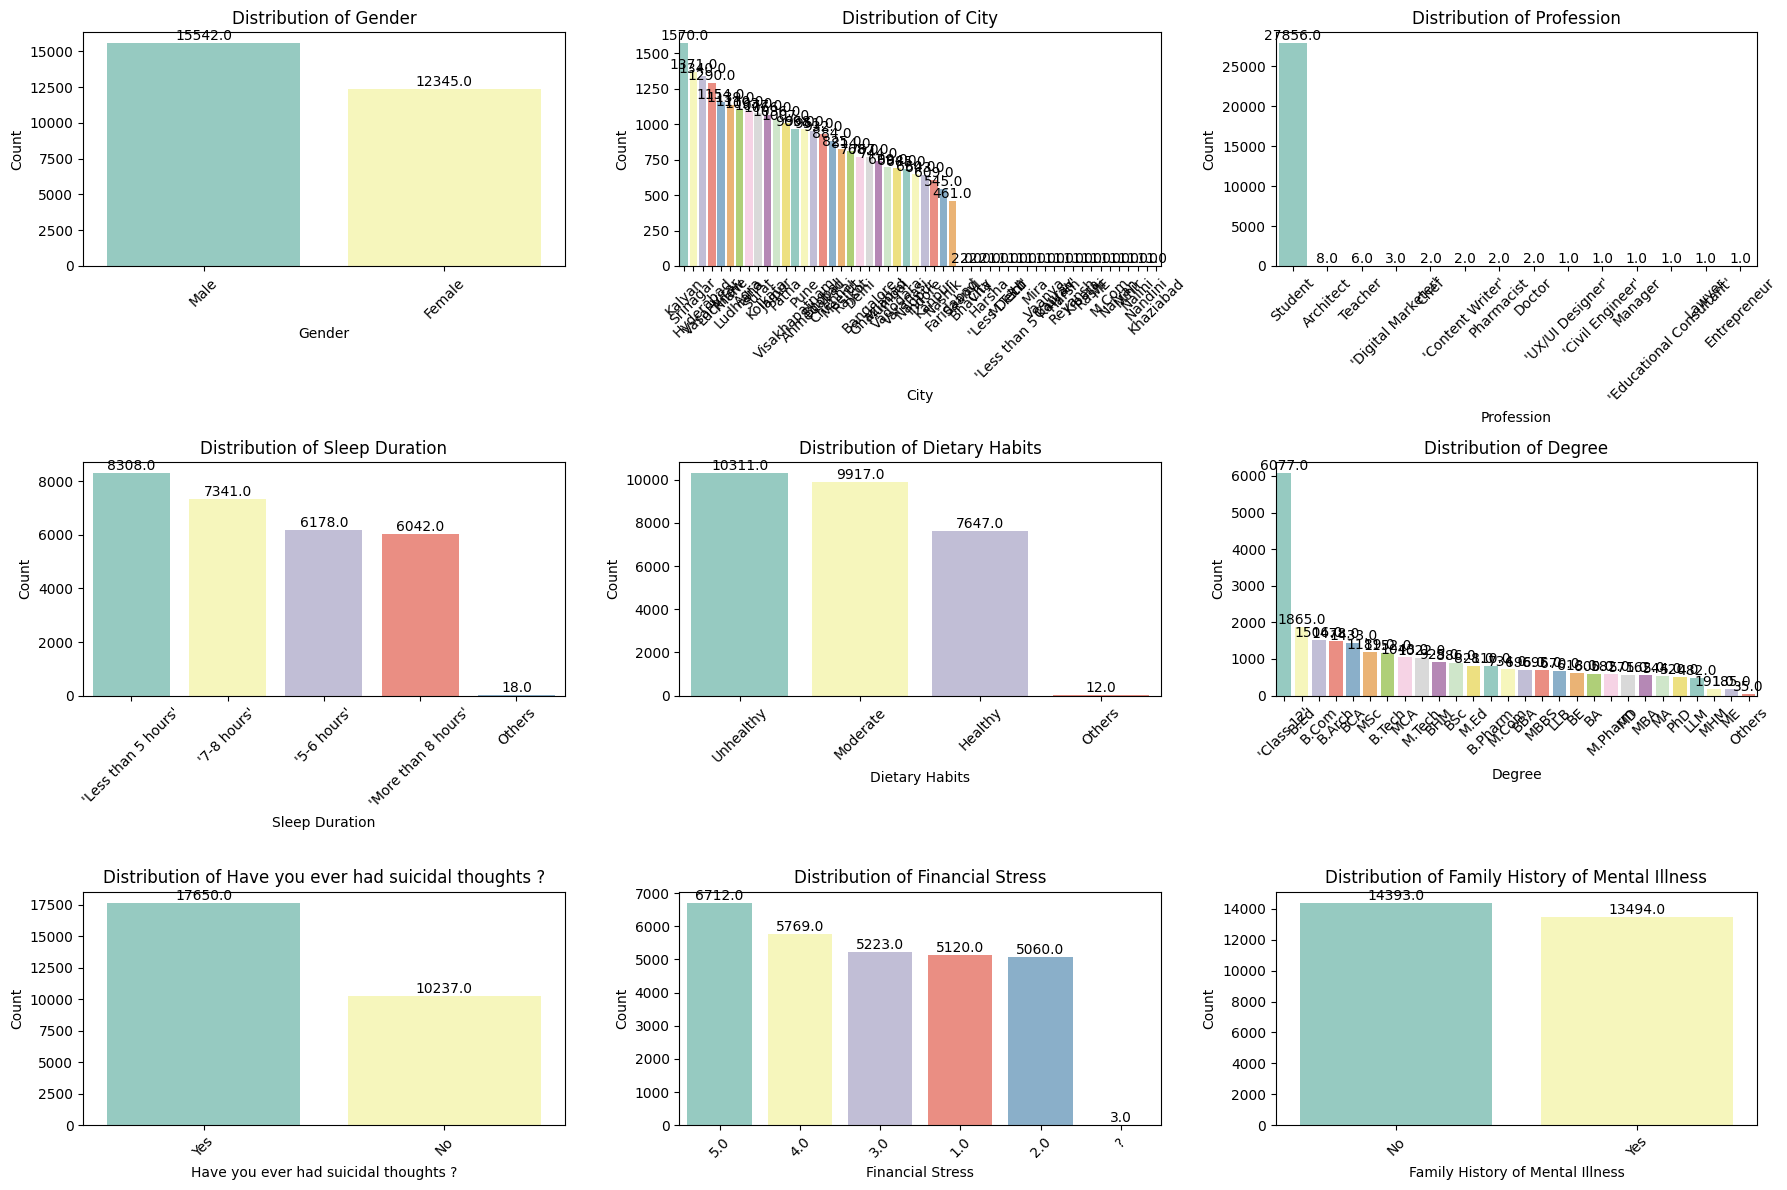

In [ ]:
plot_all_categorical_histograms(df)

In [ ]:
def plot_categorical_vs_target(df, target_col):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    num_columns = len(categorical_columns)

    cols_per_row = 3
    num_rows = (num_columns + cols_per_row - 1) // cols_per_row

    plt.figure(figsize=(6 * cols_per_row, 5 * num_rows))

    for idx, col in enumerate(categorical_columns):
        plt.subplot(num_rows, cols_per_row, idx + 1)

        # Buat tabel proporsi (normalized)
        prop_df = (df.groupby(col)[target_col].value_counts(normalize=True).unstack().fillna(0))

        # Plot stacked bar chart
        ax = prop_df.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Set3')
        plt.title(f'{col} vs {target_col} (Probability)')
        plt.ylabel('Proportion')
        plt.xlabel(col)
        plt.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45)

        for container in ax.containers:
            for bar in container:
                height = bar.get_height()
                if height > 0.01:
                    ax.text(bar.get_x() + bar.get_width() / 2,bar.get_y() + height / 2,f'{height:.2f}', ha='center',va='center',fontsize=8,color='black')

    plt.tight_layout()
    plt.show()

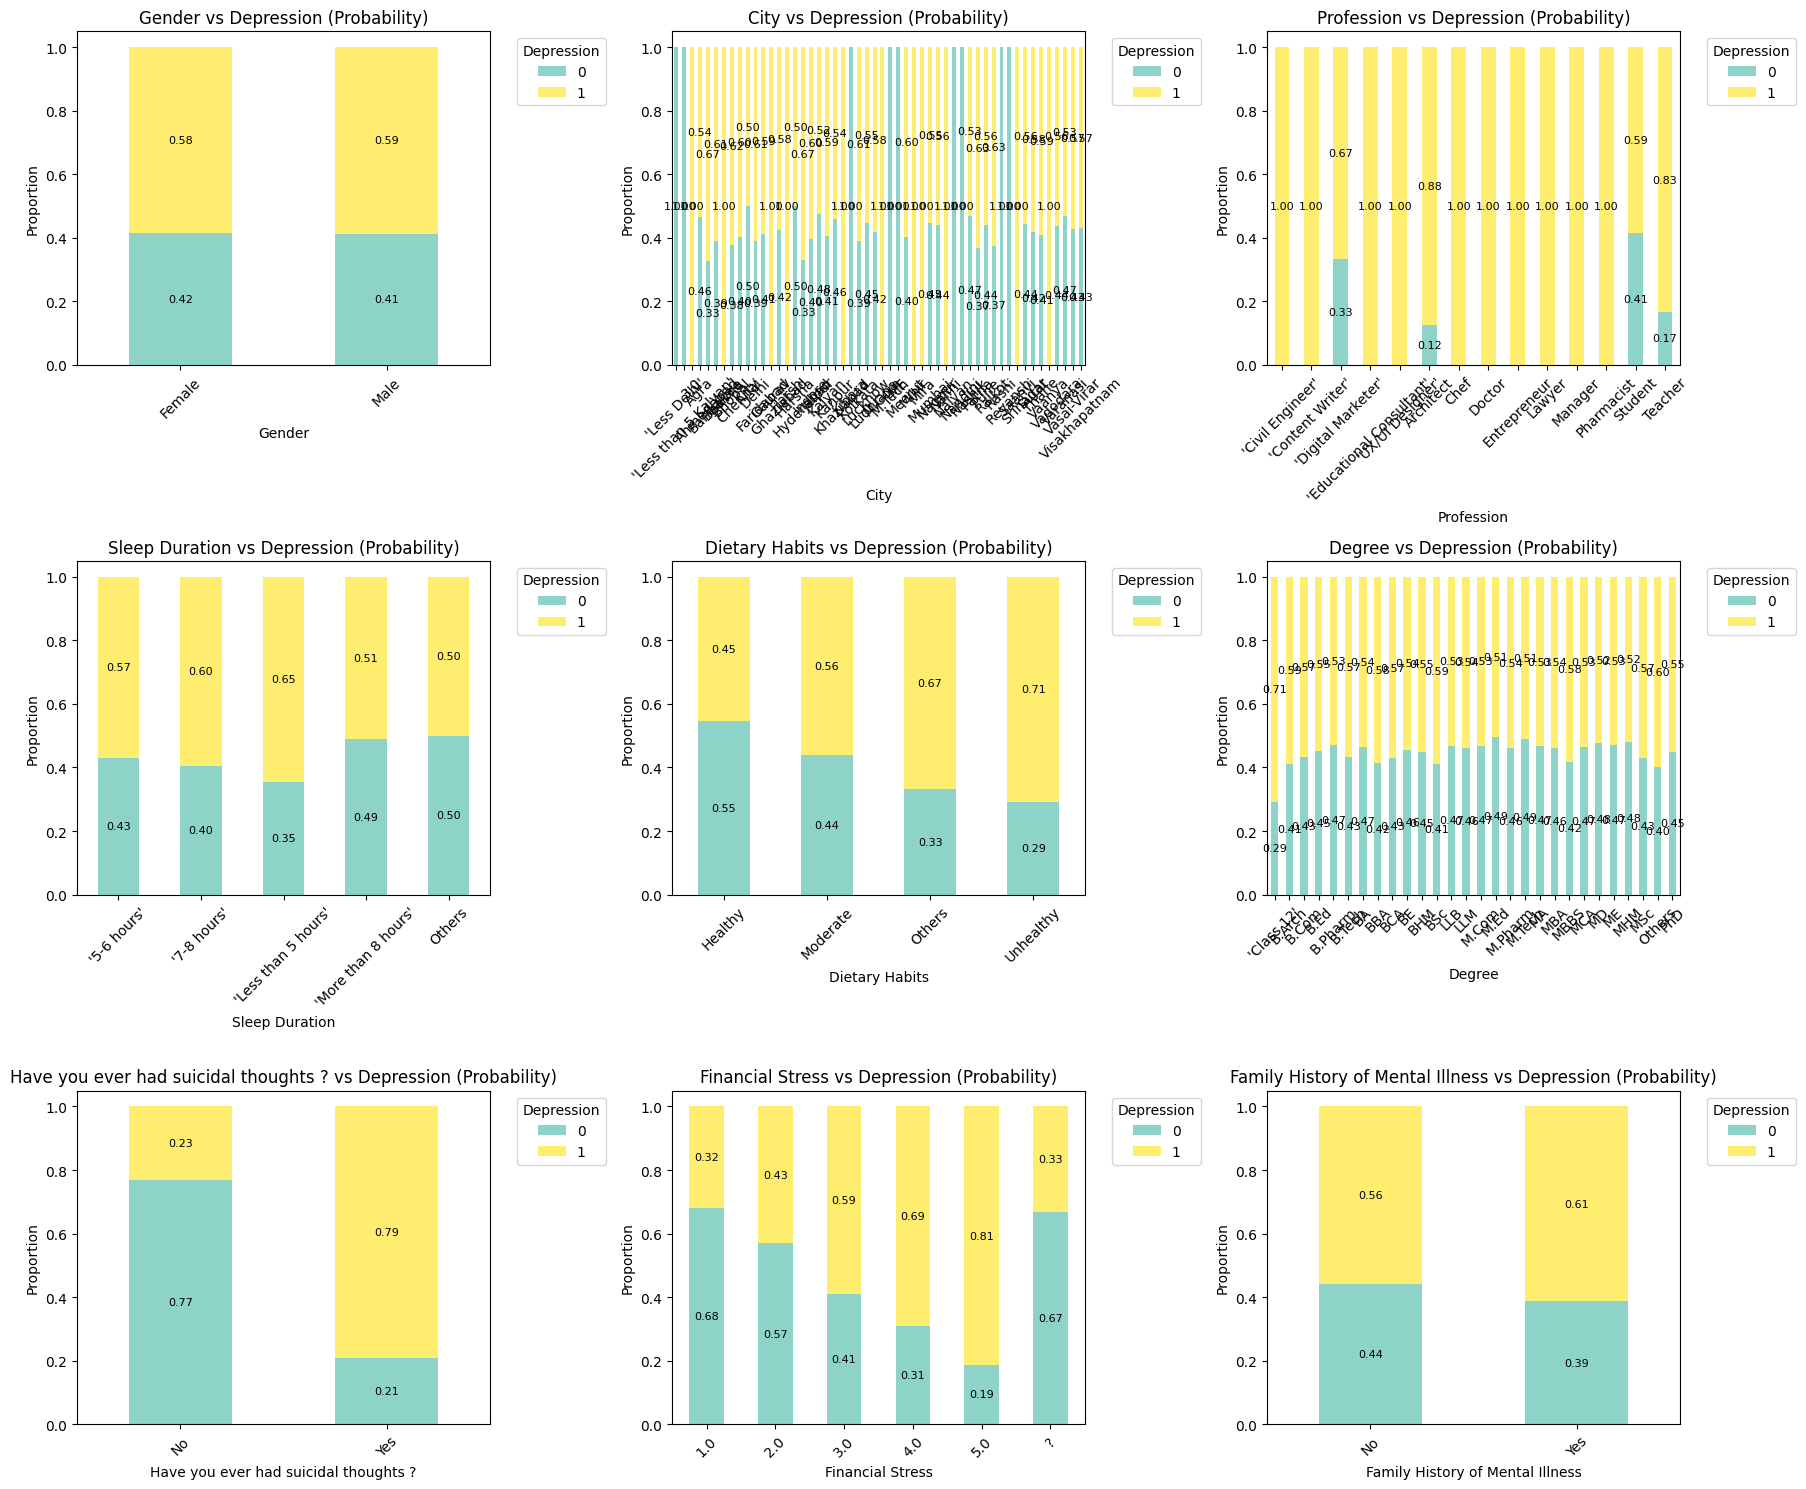

In [ ]:
plot_categorical_vs_target(df, 'Depression')

In [ ]:
df = df.drop(['CGPA', 'Work Pressure'], axis=1)

In [ ]:
df = df.drop('Job Satisfaction', axis=1)

# Prepocessing
1. handling outlier (udah diatas)
2. Standarisasi (opsional, karena model yang digunakan tidak perlu melakukan standarisasi pada datasetnya)
3. Encode

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27887 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27887 non-null  object 
 1   Age                                    27887 non-null  float64
 2   City                                   27887 non-null  object 
 3   Profession                             27887 non-null  object 
 4   Academic Pressure                      27887 non-null  float64
 5   Study Satisfaction                     27887 non-null  float64
 6   Sleep Duration                         27887 non-null  object 
 7   Dietary Habits                         27887 non-null  object 
 8   Degree                                 27887 non-null  object 
 9   Have you ever had suicidal thoughts ?  27887 non-null  object 
 10  Work/Study Hours                       27887 non-null  float64
 11  Financi

In [ ]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
#Min Max standarisasi
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# df['Age'] = scaler.fit_transform(df[['Age']])

In [ ]:
df['Study Satisfaction'].value_counts()

,count
Study Satisfaction,
4.0,6357
2.0,5836
3.0,5817
1.0,5447
5.0,4420
0.0,10


In [ ]:
df['City'].value_counts()


,count
City,
Kalyan,1570
Srinagar,1371
Hyderabad,1340
Vasai-Virar,1290
Lucknow,1154
Thane,1139
Ludhiana,1110
Agra,1093
Surat,1077


In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['City'], df['Depression'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"p-value: {p}")

p-value: 2.0064607069481708e-17


# Hasil Analisis
1. nilai p-value kurang dari 0.05, kolom city jangan di drop Menghapusnya akan menyebabkan model kehilangan fitur paling prediktif. encode dengan Weight of Evidence (WoE) Encoding (jenis target encode kategorical untuk target yang biner)
2. Tugas : cari tau apa itu Weight of Evidence (WoE) Encoding sama cari tau perhitungan chi contigency


In [ ]:
df['Degree'].value_counts()

,count
Degree,
'Class 12',6077
B.Ed,1865
B.Com,1506
B.Arch,1478
BCA,1433
MSc,1189
B.Tech,1152
MCA,1043
M.Tech,1022


In [ ]:
contingency_table = pd.crosstab(df['Degree'], df['Depression'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"p-value: {p}")

p-value: 4.6230030264113174e-95


# Analisis
1. nilai p value kurang dari 0.05 jangan drop degree, Menghapusnya akan menyebabkan model kehilangan fitur paling prediktif. encode dengan Weight of Evidence (WoE) Encoding (jenis target encode kategorical untuk target yang biner)
2. Tugas : cari tau apa itu Weight of Evidence (WoE) Encoding sama cari tau perhitungan chi contigency

In [ ]:
df['Dietary Habits'].value_counts()

,count
Dietary Habits,
Unhealthy,10311
Moderate,9917
Healthy,7647
Others,12


# Analisis
1. mapping atau label encoding cukup untuk kolom Dietary Habits

In [ ]:
df['Sleep Duration'].value_counts()

,count
Sleep Duration,
'Less than 5 hours',8308
'7-8 hours',7341
'5-6 hours',6178
'More than 8 hours',6042
Others,18


# Analisis
1. mapping jadi kurang dari 5 jam dan lebih dari 5 jam

In [ ]:
df['Profession'].value_counts()

,count
Profession,
Student,27856
Architect,8
Teacher,6
'Digital Marketer',3
Chef,2
'Content Writer',2
Pharmacist,2
Doctor,2
'UX/UI Designer',1


# Analisis
1. mapping jadi student dan bukan student

In [ ]:
df['Have you ever had suicidal thoughts ?'].value_counts()


,count
Have you ever had suicidal thoughts ?,
Yes,17650
No,10237


In [ ]:
df['Financial Stress'].value_counts()


,count
Financial Stress,
5.0,6712
4.0,5769
3.0,5223
1.0,5120
2.0,5060
?,3


In [ ]:
df['Family History of Mental Illness'].value_counts()

,count
Family History of Mental Illness,
No,14393
Yes,13494


# Encode

In [ ]:
import numpy as np
def woe_encoder(df, feature, target):
    prob_event = df.groupby(feature)[target].mean()
    woe = np.log(prob_event / (1 - prob_event))
    return df[feature].map(woe)

In [ ]:
df['City'] = woe_encoder(df, 'City', 'Depression')
df['Degree'] = woe_encoder(df, 'Degree', 'Depression')

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
diet_order = {'Healthy': 3, 'Moderate': 2, 'Unhealthy': 1, 'Others': 0}
df['Dietary Habits'] = df['Dietary Habits'].map(diet_order)

In [ ]:
df['Sleep Duration'] = df['Sleep Duration'].str.replace(r'[\'"\’\‘]', '', regex=True)
df['Sleep Duration'] = df['Sleep Duration'].apply(lambda x: 1 if x == 'Less than 5 hours' else 0)

In [ ]:
df['Profession'] = df['Profession'].apply(lambda x: 1 if x == 'Student' else 0)

In [ ]:
df = df[df['Financial Stress'] != '?']
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Family History of Mental Illness'] = label_encoder.fit_transform(df['Family History of Mental Illness'])
df['Have you ever had suicidal thoughts ?'] = label_encoder.fit_transform(df['Have you ever had suicidal thoughts ?'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [ ]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,0.280462,1,5.0,2.0,0,3,0.113703,1,3.0,1.0,0,1
1,0,24.0,0.442547,1,2.0,5.0,0,2,0.365179,0,3.0,2.0,1,0
2,1,31.0,0.227083,1,3.0,5.0,1,3,0.140229,0,9.0,1.0,1,0
3,0,28.0,0.125713,1,3.0,2.0,0,2,0.288089,1,4.0,5.0,1,1
4,0,25.0,0.096600,1,4.0,3.0,0,2,0.039144,1,1.0,1.0,0,0


# Pembangunan Model Baseline


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Depression', axis=1)
y = df['Depression']

X = X.replace([np.inf, -np.inf], np.nan)
X = X[~X.isnull().any(axis=1)]
y = y[X.index]

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
X_train_lr = scaler.fit_transform(X_train)
X_test_lr = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

baseline_model = LogisticRegression(random_state=42)
baseline_model.fit(X_train_lr, y_train)

LogisticRegression(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score

y_pred = baseline_model.predict(X_test_lr)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8444284945271846
Confusion Matrix:
 [[1814  495]
 [ 372 2892]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      2309
           1       0.85      0.89      0.87      3264

    accuracy                           0.84      5573
   macro avg       0.84      0.84      0.84      5573
weighted avg       0.84      0.84      0.84      5573



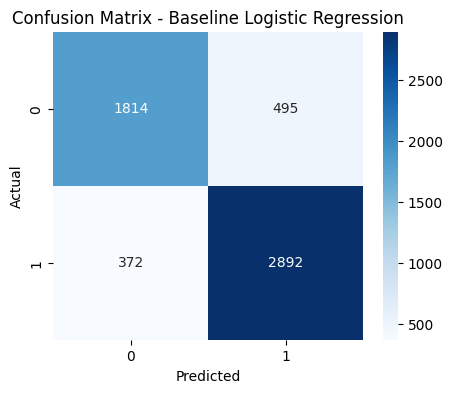

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Baseline Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
#Cek Overfitting
y_pred_train = baseline_model.predict(X_train_lr)

metrics = {
    'Metric': ['Accuracy', 'Recall'],
    'Training Set': [
        accuracy_score(y_train, y_pred_train),
        recall_score(y_train, y_pred_train)
    ],
    'Test Set': [
        accuracy_score(y_test, y_pred),
        recall_score(y_test, y_pred)
    ]
}
metrics_df = pd.DataFrame(metrics)
metrics_df['Difference (Train-Test)'] = metrics_df['Training Set'] - metrics_df['Test Set']
metrics_df[['Training Set', 'Test Set', 'Difference (Train-Test)']] = \
    metrics_df[['Training Set', 'Test Set', 'Difference (Train-Test)']].applymap(
        lambda x: f"{x:.2%}" if isinstance(x, (int, float)) else x
    )

print("\nPerformance Metrics:")
display(metrics_df)


Performance Metrics:


<ipython-input-70-62d2cfbc6b37>:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  metrics_df[['Training Set', 'Test Set', 'Difference (Train-Test)']].applymap(


,Metric,Training Set,Test Set,Difference (Train-Test)
0,Accuracy,84.93%,84.44%,0.49%
1,Recall,88.87%,88.60%,0.27%


# Eksplorasi Model


### Logistic Regression dengan Hyperparameter menggunakan Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='recall')
grid_lr.fit(X_train_lr, y_train)

print("Best params (Logistic Regression):", grid_lr.best_params_)
print("Best score:", grid_lr.best_score_)

best_lr_model = grid_lr.best_estimator_

Best params (Logistic Regression): {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.9024128686327078


In [ ]:
#Ini buat cek overfitting apa eggak aja, bisa dihapus klo mau

y_train_pred = best_lr_model.predict(X_train_lr)
train_recall = recall_score(y_train, y_train_pred)

y_test_pred = best_lr_model.predict(X_test_lr)
test_recall = recall_score(y_test, y_test_pred)

print(f"Training Recall: {train_recall:.4f}")
print(f"Testing Recall: {test_recall:.4f}")

# Analisis overfitting
if train_recall - test_recall > 0.1:  # Threshold bisa disesuaikan
    print("Warning: Model mungkin overfitting (perbedaan recall train-test terlalu besar)")
elif test_recall > train_recall:
    print("Model mungkin underfitting (perform test lebih baik dari train)")
else:
    print("Performa model cukup seimbang antara train dan test")

Training Recall: 0.9006
Testing Recall: 0.8961
Performa model cukup seimbang antara train dan test


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='recall')
grid_rf.fit(X_train, y_train)

print("Best params (Random Forest):", grid_rf.best_params_)
print("Best score:", grid_rf.best_score_)

best_rf_model = grid_rf.best_estimator_

Best params (Random Forest): {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.8975871313672922


### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='recall')
grid_gb.fit(X_train, y_train)

print("Best params (Gradient Boosting):", grid_gb.best_params_)
print("Best score:", grid_gb.best_score_)

best_gb_model = grid_gb.best_estimator_

Best params (Gradient Boosting): {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best score: 0.8883186518575258


### K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='recall')
grid_knn.fit(X_train, y_train)

print("Best params (KNN):", grid_knn.best_params_)
print("Best score:", grid_knn.best_score_)

best_knn_model = grid_knn.best_estimator_

Best params (KNN): {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best score: 0.8796629643814631


## Pilih 3 dari 4 model diatas, saran sih yang di drop yang gradient boosting. soalnya susah ngejawabnya semisal ditanya rumus matematiknya gimana,

### nanti dilaporannya tambahin alasan kenapa make 3 model ini buat dataset ini, chat gpt aja. sama tambahin rumus terkait modelnya

## Evaluasi Model

In [ ]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    return {
        "Model": name,
        "Accuracy": accuracy,
        "Recall": recall,
        "Confusion Matrix": cm
    }

# Evaluasi untuk setiap model
results = [
    evaluate_model("Logistic Regression", best_lr_model, X_test_lr, y_test),
    evaluate_model("Random Forest", best_rf_model, X_test, y_test),
    evaluate_model("Gradient Boosting", best_gb_model, X_test, y_test),
]

# Tampilkan ringkasan evaluasi dalam DataFrame
eval_df = pd.DataFrame(results).drop(columns="Confusion Matrix")
print(eval_df)


                 Model  Accuracy    Recall
0  Logistic Regression  0.838866  0.896140
1        Random Forest  0.833303  0.897978
2    Gradient Boosting  0.840122  0.886949


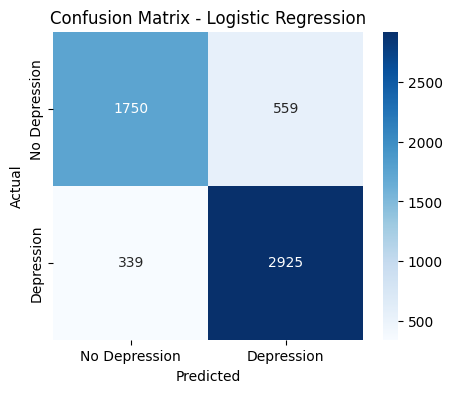

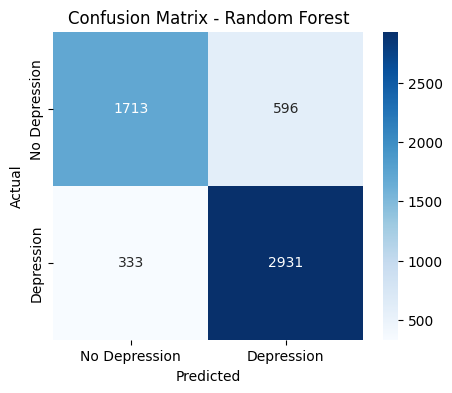

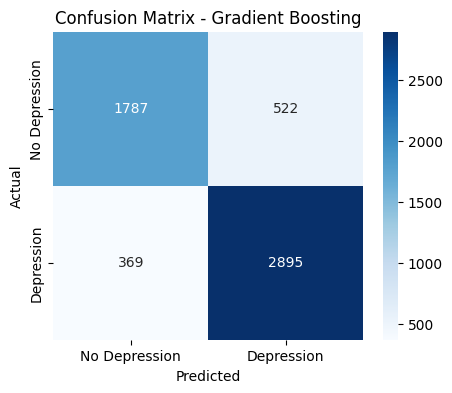

In [ ]:
for result in results:
    cm = result["Confusion Matrix"]
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
    plt.title(f"Confusion Matrix - {result['Model']}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()